In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import shutil

In [34]:
# Load the data from the CSV file
file_path = './dataset/ISIC_2019_Training_GroundTruth.csv'
image_folder_path = './dataset/ISIC_2019_Training_Input/'
data = pd.read_csv(file_path)

In [35]:
# Sum the number of images in each class
class_counts = data.iloc[:, 1:].sum()

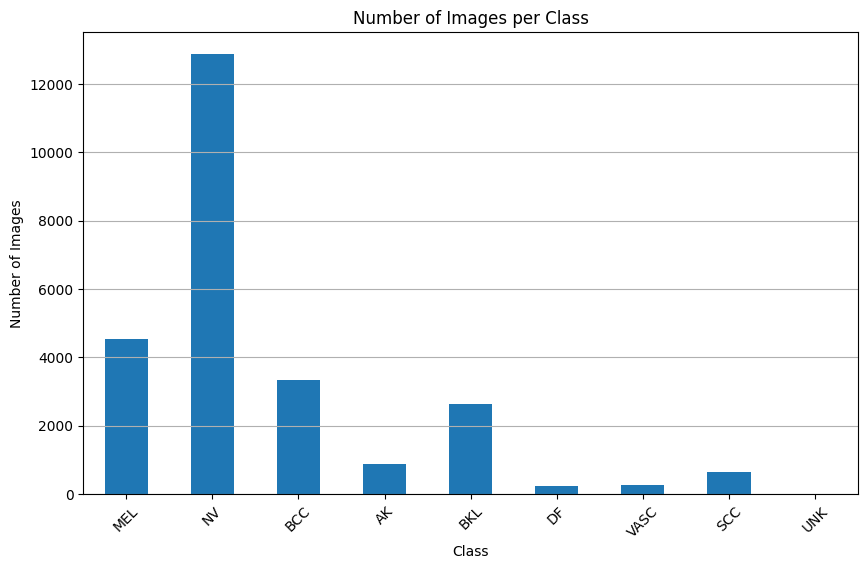

In [36]:
# Create a bar chart to visualize the number of images per class
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [37]:
# Display the bar chart
plt.show()

In [38]:
# Print the precise numbers of images in each class
print(class_counts)

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64


In [39]:
# Identify classes with less than 700 images
classes = data.columns[1:]
classes_to_augment = [cls for cls in classes if data[cls].sum() < 700]

# Create a new folder for augmented images
new_folder_path = './dataset/isic_2019'
os.makedirs(new_folder_path, exist_ok=True)

# Function to rotate image
def rotate_image(image_path, angle):
    image = Image.open(image_path)
    return image.rotate(angle)

# Process the images for augmentation
new_data = []
for cls in data.columns[1:]:
    class_data = data[data[cls] == 1]
    
    # For classes with less than 700 images, augment by rotating at 120 and 240 degrees and keep originals
    if class_data.shape[0] < 500:
        for _, row in class_data.iterrows():
            image_name = row['image']
            image_path = os.path.join(image_folder_path, image_name + '.jpg')
            
            # Rotate and save the images at 120 and 240 degrees
            for angle in [120, 240]:
                rotated_image = rotate_image(image_path, angle)
                rotated_image_name = f'{image_name}_rotated_{angle}'
                rotated_image_path = os.path.join(new_folder_path, rotated_image_name + '.jpg')
                rotated_image.save(rotated_image_path)
                
                # Add a new row for each rotated image
                new_row = row.copy()
                new_row['image'] = rotated_image_name
                new_data.append(new_row)

            # Save the original image to the new folder as well
            shutil.copy(image_path, os.path.join(new_folder_path, image_name + '.jpg'))
            new_data.append(row)

    # For classes with more than 1000 images, randomly select 1000
    elif class_data.shape[0] > 1000:
        selected_data = class_data.sample(n=1000, random_state=42)
        for _, row in selected_data.iterrows():
            image_name = row['image']
            src_path = os.path.join(image_folder_path, image_name + '.jpg')
            dst_path = os.path.join(new_folder_path, image_name + '.jpg')
            shutil.copy(src_path, dst_path)
            new_data.append(row)

    # For other classes, move all images
    else:
        for _, row in class_data.iterrows():
            image_name = row['image']
            src_path = os.path.join(image_folder_path, image_name + '.jpg')
            dst_path = os.path.join(new_folder_path, image_name + '.jpg')
            shutil.copy(src_path, dst_path)
            new_data.append(row)

# Create a new dataframe with the updated images
new_df = pd.DataFrame(new_data)

# Save the new dataframe to a new CSV file
new_csv_path = './dataset/isic_2019.csv'  # Modify as needed
new_df.to_csv(new_csv_path, index=False)

In [40]:
# Load the data from the CSV file
file_path = './dataset/isic_2019.csv'
image_folder_path = './dataset/isic_2019/'
data = pd.read_csv(file_path)

In [41]:
# Sum the number of images in each class
class_counts = data.iloc[:, 1:].sum()

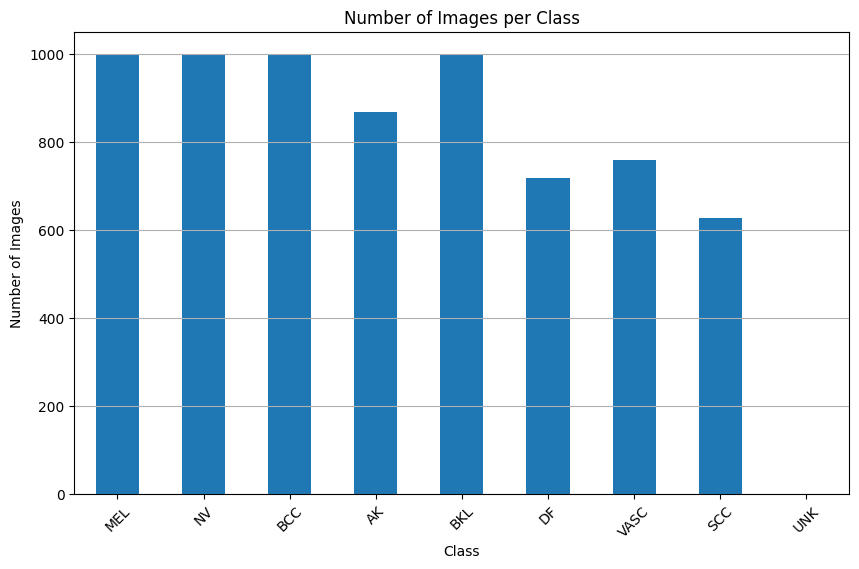

In [42]:
# Create a bar chart to visualize the number of images per class
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [43]:
# Display the bar chart
plt.show()

In [44]:
# Print the precise numbers of images in each class
print(class_counts)

MEL     1000.0
NV      1000.0
BCC     1000.0
AK       867.0
BKL     1000.0
DF       717.0
VASC     759.0
SCC      628.0
UNK        0.0
dtype: float64
